In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10,6) #adjust the size of plot we would creaate

#read in the data

df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (6)\movies.csv")

In [23]:
#lest look at the data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7,108000,719,351,271,47,6000000,39846344,1083,98
5,1509,6,9,1980,1922,6,123000,1758,3081,155,47,550000,39754601,1108,95
6,3930,6,0,1980,1359,7,188000,974,576,860,47,27000000,115229890,1397,133
7,3122,6,3,1980,530,8,330000,1269,1257,1469,47,18000000,23402427,390,129
8,3732,4,0,1980,1346,6,101000,1606,1402,595,47,54000000,108185706,548,127
9,4401,6,3,1980,1755,7,10000,2011,280,402,47,10000000,15795189,1391,100


In [3]:
df.shape


(7668, 15)

In [4]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
#calculate for missing values

for col in df.columns:
    num_missing = df[col].isnull().sum()
    print(f"Column '{col}' has {num_missing} null values.")


Column 'name' has 0 null values.
Column 'rating' has 77 null values.
Column 'genre' has 0 null values.
Column 'year' has 0 null values.
Column 'released' has 2 null values.
Column 'score' has 3 null values.
Column 'votes' has 3 null values.
Column 'director' has 0 null values.
Column 'writer' has 3 null values.
Column 'star' has 1 null values.
Column 'country' has 3 null values.
Column 'budget' has 2171 null values.
Column 'gross' has 189 null values.
Column 'company' has 17 null values.
Column 'runtime' has 4 null values.


In [6]:
#we're dropping all the rows with null vlaues in order to get a more accurate data

df.dropna(inplace=True)

In [7]:
# checking the number of rows for our new datatframe

df.shape

(5421, 15)

In [8]:
#datatypes for our column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#changing the datatypes from floats to int64

df['score'] = df['score'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [10]:
#sort the data by the gross in a descending order

df.sort_values(by=['gross'],inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


In [11]:
#print the whole dataframe

pd.set_option('display.max_rows', None)


In [12]:
#check for duplicates

duplicate_rows = df[df.duplicated()]

duplicate_rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


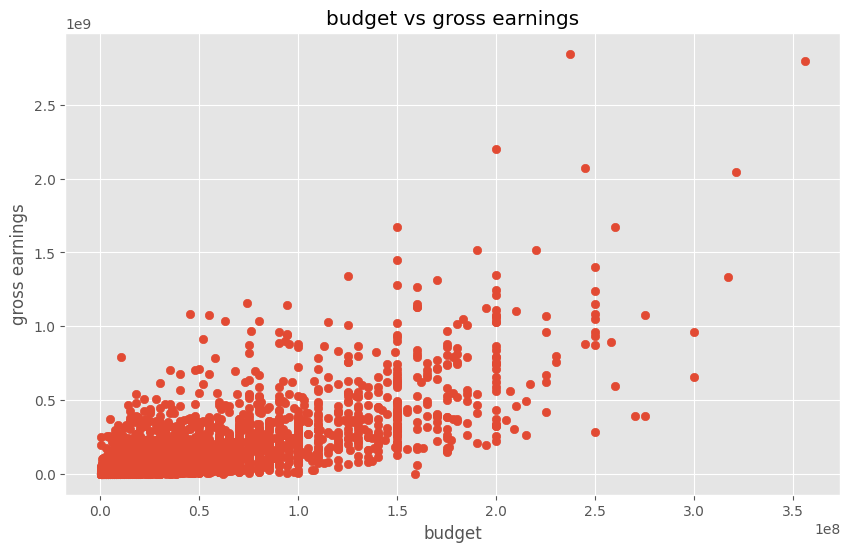

In [13]:
#scatterplot between gross and revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('budget vs gross earnings')

plt.xlabel('budget')
plt.ylabel('gross earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

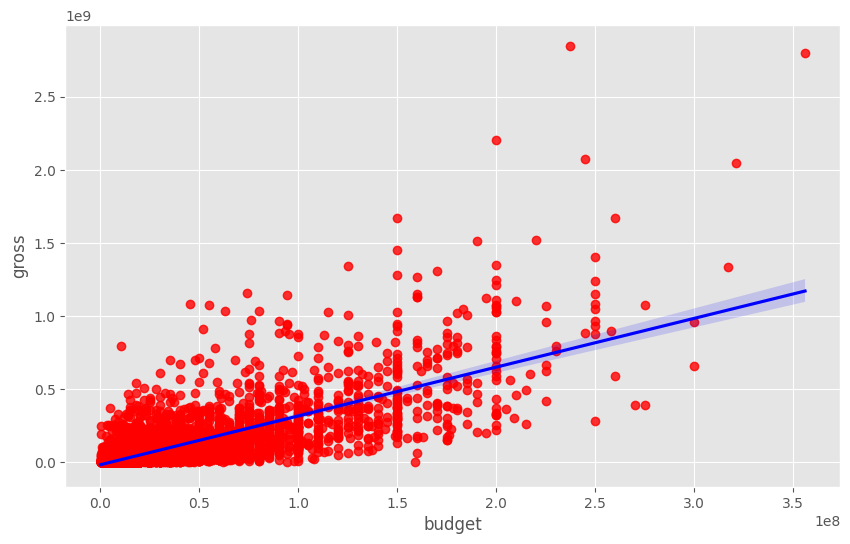

In [14]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data =df, scatter_kws ={'color':'red'}, line_kws={'color':'blue'})

In [15]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [16]:
numeric_columns = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
correlation_matrix = df[numeric_columns].corr()  #pearson,kendall,spearman
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000


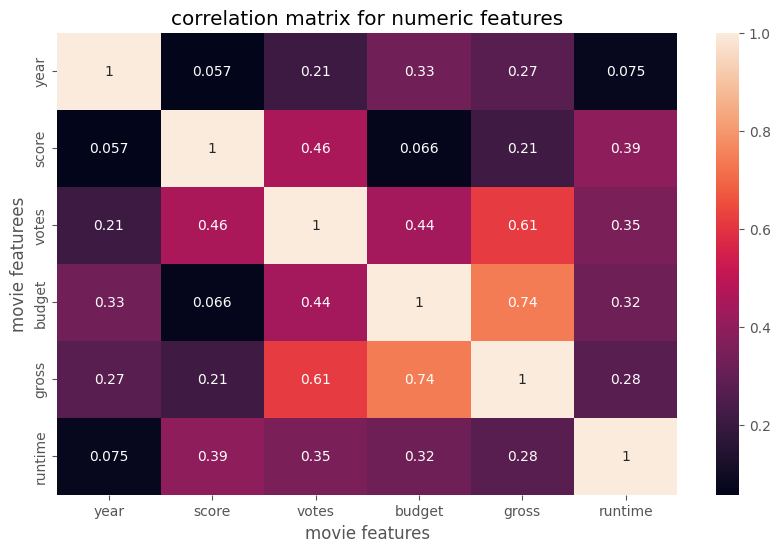

In [17]:
correlation_matrix = df[numeric_columns].corr() 

sns.heatmap(correlation_matrix, annot =True)

plt.title('correlation matrix for numeric features')

plt.xlabel('movie features')
plt.ylabel('movie featurees')

plt.show;

In [24]:
#changing the datatypes object to category so we can include it in our correlation

df_numerized = df  # Create a copy of the original DataFrame

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7,108000,719,351,271,47,6000000,39846344,1083,98
5,1509,6,9,1980,1922,6,123000,1758,3081,155,47,550000,39754601,1108,95
6,3930,6,0,1980,1359,7,188000,974,576,860,47,27000000,115229890,1397,133
7,3122,6,3,1980,530,8,330000,1269,1257,1469,47,18000000,23402427,390,129
8,3732,4,0,1980,1346,6,101000,1606,1402,595,47,54000000,108185706,548,127
9,4401,6,3,1980,1755,7,10000,2011,280,402,47,10000000,15795189,1391,100


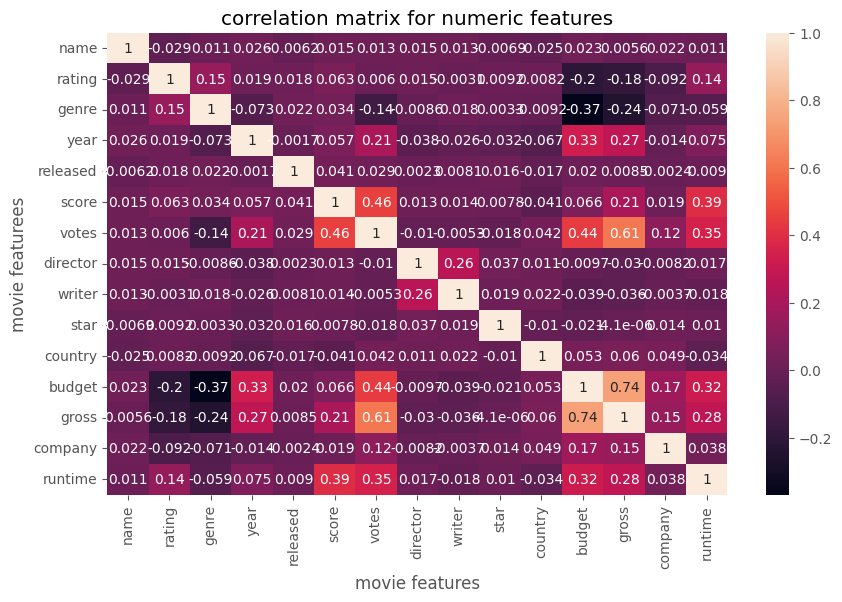

In [19]:
#visualize the correlation for every column

correlation_matrix2 = df_numerized.corr() 

sns.heatmap(correlation_matrix2, annot =True)

plt.title('correlation matrix for numeric features')

plt.xlabel('movie features')
plt.ylabel('movie featurees')

plt.show;

In [20]:
#unstacking the correlation pairs

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.015473
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.063464
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [21]:
#sorting the correation pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre     budget     -0.368523
budget    genre      -0.368523
gross     genre      -0.244101
genre     gross      -0.244101
rating    budget     -0.203946
budget    rating     -0.203946
rating    gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
rating    company    -0.092357
company   rating     -0.092357
genre     year       -0.073167
year      genre      -0.073167
company   genre      -0.071334
genre     company    -0.071334
country   year       -0.066748
year      country    -0.066748
runtime   genre      -0.059237
genre     runtime    -0.059237
score     country    -0.040816
country   score      -0.040816
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
runtime   country    -0.034477
country   runtime    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [22]:
#checking for movie features with high correlation value

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

THE END 